In [1]:
from pathlib import Path

from forecasting_models.arima.model import ARIMAForecastModel

arima_model = ARIMAForecastModel(Path("__file__").parent / Path("examples/configs/arima/arima_config_example.yaml"))

In [2]:
from data_utils.csv_utils import read_timeseries_csv

print(arima_model.config.data_path)

train_df = read_timeseries_csv(arima_model.config.data_path)

examples/sample_data/resource_usage_example_TRAIN.csv


(22595, 1)

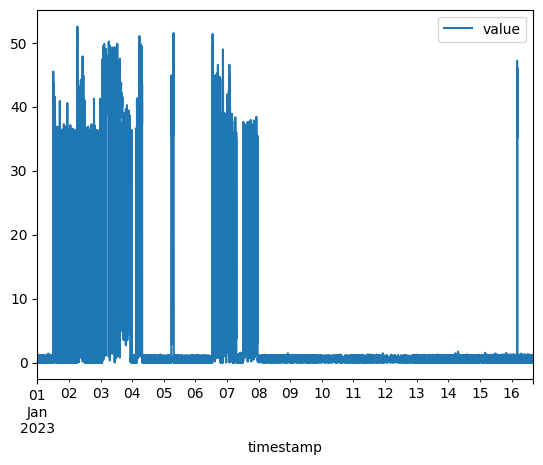

In [3]:
train_df.plot()
train_df.shape

<Axes: xlabel='timestamp'>

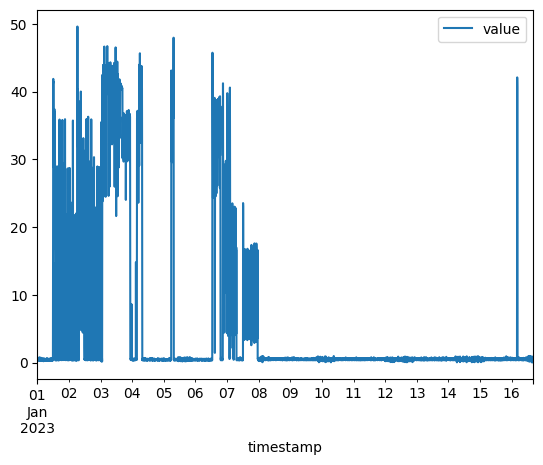

In [4]:
from data_utils.preprocessing import init_preprocess, resample_timeseries_dataframe

# preprocess training dataset to showcase the configured internal pre-processing outcome
preproc_train_df = init_preprocess(
    train_df,
    base_step=arima_model.config.preprocessing_parameters.initial_timedelta,
)
preproc_train_df = resample_timeseries_dataframe(
    preproc_train_df,
    step=arima_model.config.preprocessing_parameters.target_timedelta,
)

preproc_train_df.plot()

In [5]:
arima_model.train()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4519
Model:               SARIMAX(6, 1, 0)   Log Likelihood              -13286.884
Date:                Tue, 27 Feb 2024   AIC                          26587.769
Time:                        16:58:38   BIC                          26632.679
Sample:                    01-01-2023   HQIC                         26603.590
                         - 01-16-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4630      0.005    -86.094      0.000      -0.474      -0.452
ar.L2         -0.3070      0.007    -46.366      0.000      -0.320      -0.294
ar.L3         -0.2541      0.008    -31.241      0.000      -0.270      -0.238
ar.L4         -0.2354      0.009    -25.954      0.000      -0.253      -0.218
ar.L5         -0.2204      0.009    -25.271      0.000      -0.237      -0.203
ar.L6         -0.1866      0.006    -31.891      0.000      -0.198      -0.175
sigma2        20.9827      0.136    153.848      0.000      20.715      21.250
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             74174.77
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
arima_model.order()

(6, 1, 0)

In [8]:
test_df = read_timeseries_csv("./examples/sample_data/resource_usage_example_TEST.csv")

<Axes: xlabel='timestamp'>

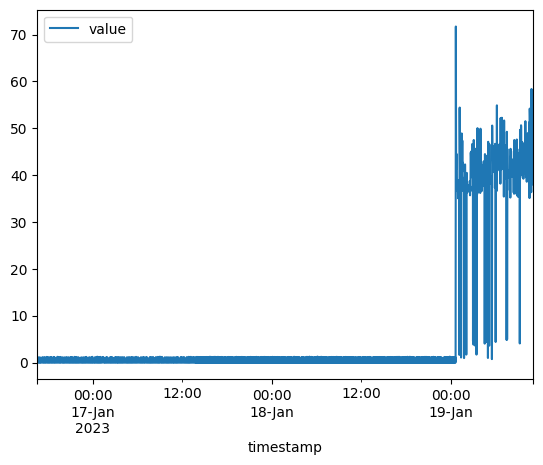

In [9]:
test_df.plot()

<Axes: xlabel='timestamp'>

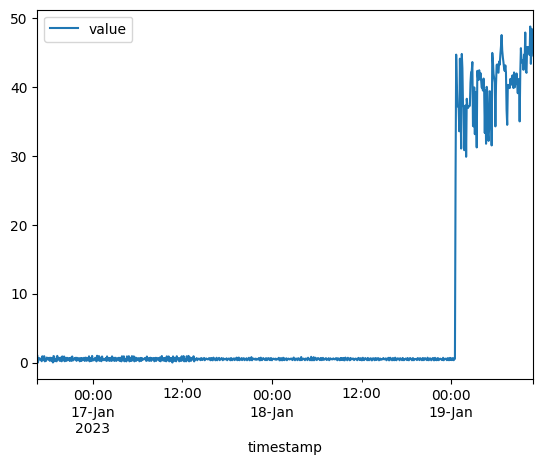

In [10]:
# preprocess training dataset to showcase the configured internal pre-processing outcome
preproc_test_df = init_preprocess(
    test_df,
    base_step=arima_model.config.preprocessing_parameters.initial_timedelta,
)
preproc_test_df = resample_timeseries_dataframe(
    preproc_test_df,
    step=arima_model.config.preprocessing_parameters.target_timedelta,
)

preproc_test_df.plot()

In [11]:
actuals, preds = arima_model.test(test_df)

In [15]:
anomaly_df = arima_model.flag_anomalies(actuals, preds, threshold_margin_size=20)

In [16]:
anomaly_count = len(anomaly_df[anomaly_df["is_anomaly"] == 1])
print(f"Anomaly count: {anomaly_count}")

anomaly_df.head()

Anomaly count: 6


,actual,predicted,diff,is_anomaly
2023-01-16 16:40:00,0.955621,0.419834,0.535787,0
2023-01-16 16:45:00,0.007500,0.407206,-0.399706,0
2023-01-16 16:50:00,0.645425,0.451264,0.194160,0
2023-01-16 16:55:00,0.445010,0.416790,0.028220,0
2023-01-16 17:00:00,0.606107,0.484740,0.121367,0


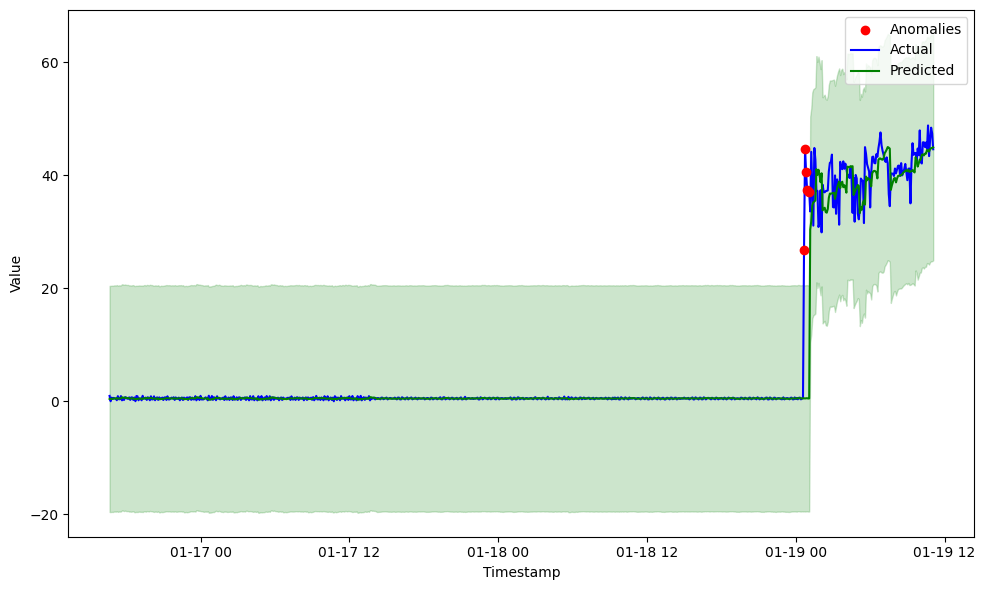

In [17]:
arima_model.plotter.plot_anomalies(anomaly_df, 20)

<Axes: xlabel='timestamp'>

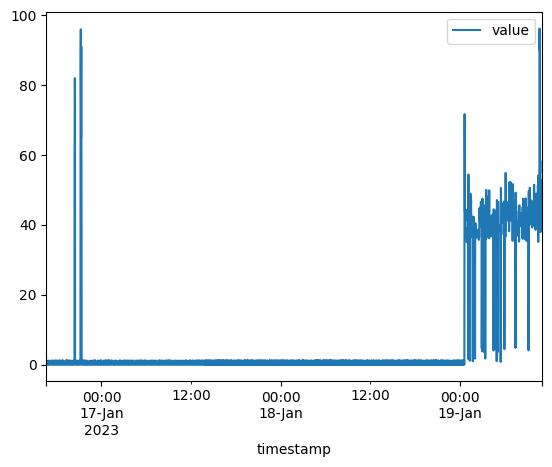

In [18]:
from pathlib import Path


test_df_w_anomalies = read_timeseries_csv(Path("./examples/sample_data/resource_usage_example_ANOMALY_TEST.csv"))

test_df_w_anomalies.plot()

In [19]:
anomaly_actuals, anomaly_preds = arima_model.test(test_df_w_anomalies)

In [20]:
anomaly_df_test = arima_model.flag_anomalies(anomaly_actuals, anomaly_preds, threshold_margin_size=20)

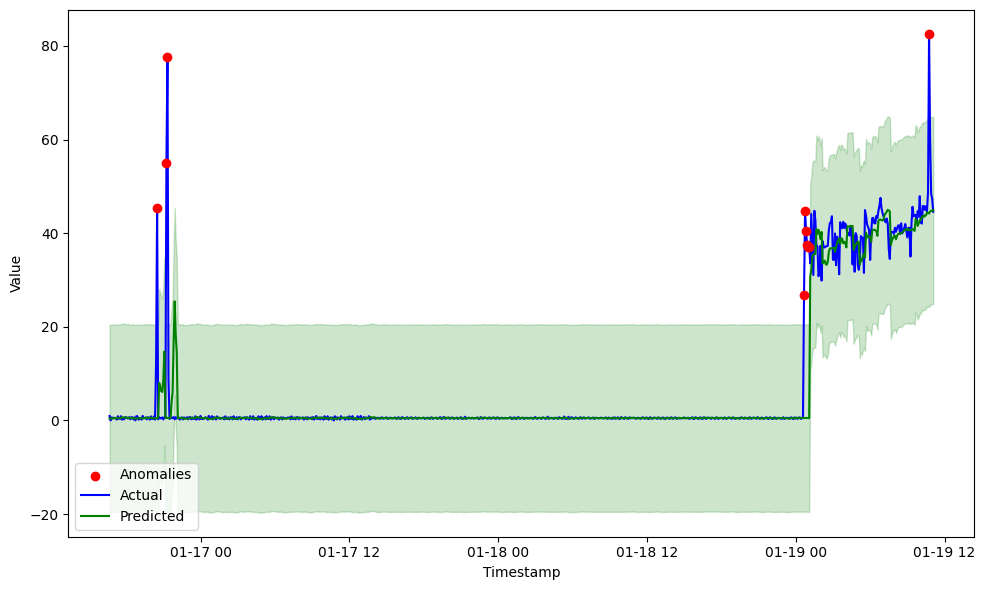

In [21]:
arima_model.plotter.plot_anomalies(anomaly_df_test, threshold_margin_size=20)